In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('SimpsonTrain.csv')
data = np.array(df)
m, n = data.shape
np.random.shuffle(data)
x_train = data[:, 1:]
x_train = x_train / 255
x_train = x_train.T
y_train = data[:, 0]
y_train = y_train.T

In [ ]:
ds = pd.read_csv('SimpsonTest.csv')
dat = np.array(ds)
x_test = dat[:, 1:]
y_test = dat[:, 0]
x_test = x_test / 255
x_test = x_test.T
y_test = y_test.T

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 1000 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 0.10, 100000)

Iteration:  0
[9 9 9 ... 9 2 9] [6 3 1 ... 7 7 9]
0.09975
Iteration:  1000
[5 7 7 ... 4 9 5] [6 3 1 ... 7 7 9]
0.181875
Iteration:  2000
[5 1 4 ... 4 9 5] [6 3 1 ... 7 7 9]
0.229875
Iteration:  3000
[5 1 4 ... 4 9 5] [6 3 1 ... 7 7 9]
0.240375
Iteration:  4000
[5 1 4 ... 4 9 5] [6 3 1 ... 7 7 9]
0.249875
Iteration:  5000
[5 1 4 ... 4 8 5] [6 3 1 ... 7 7 9]
0.26175
Iteration:  6000
[6 1 4 ... 4 8 5] [6 3 1 ... 7 7 9]
0.277375
Iteration:  7000
[6 1 4 ... 4 8 5] [6 3 1 ... 7 7 9]
0.29
Iteration:  8000
[6 1 4 ... 4 8 5] [6 3 1 ... 7 7 9]
0.2985
Iteration:  9000
[6 1 4 ... 4 8 5] [6 3 1 ... 7 7 9]
0.31075
Iteration:  10000
[8 1 4 ... 4 8 9] [6 3 1 ... 7 7 9]
0.31525
Iteration:  11000
[8 1 4 ... 4 8 9] [6 3 1 ... 7 7 9]
0.31875
Iteration:  12000
[6 1 4 ... 4 8 5] [6 3 1 ... 7 7 9]
0.33
Iteration:  13000
[6 1 4 ... 9 8 9] [6 3 1 ... 7 7 9]
0.333125
Iteration:  14000
[6 1 4 ... 9 8 9] [6 3 1 ... 7 7 9]
0.337375
Iteration:  15000
[9 1 4 ... 4 9 1] [6 3 1 ... 7 7 9]
0.329
Iteration:  16000
[9 1 

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


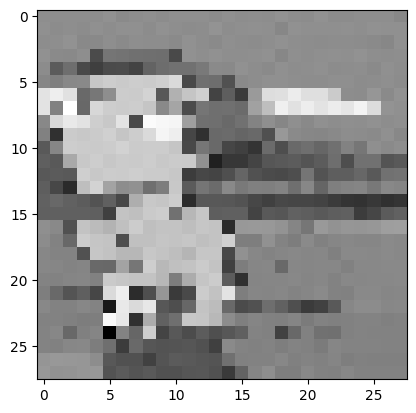

Prediction:  [1]
Label:  3


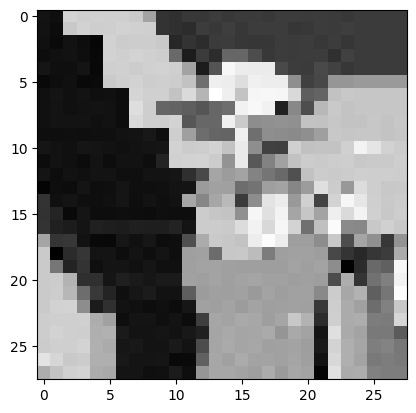

Prediction:  [5]
Label:  1


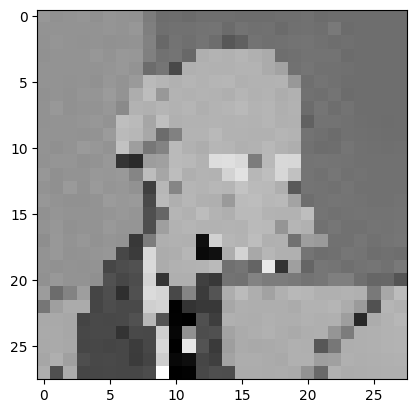

Prediction:  [9]
Label:  1


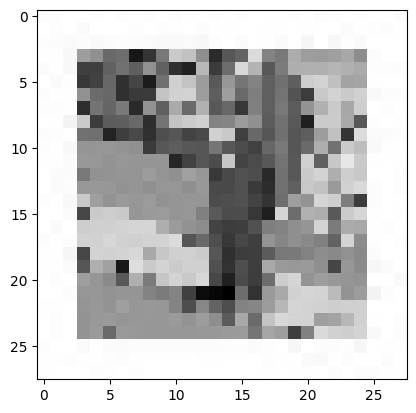

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
test_predictions = make_predictions(x_test, W1, b1, W2, b2)
accuracy = get_accuracy(test_predictions, y_test)

[5 0 5 ... 5 9 5] [0 0 0 ... 9 9 9]


In [ ]:
print("Accuracy: ",accuracy)

Accuracy:  0.235
